# Run The Following Cells, But DO NOT WORRY ABOUT THE CODE!

If you have never used this notebook before, start by running this cell to install the necessary packages.

In [1]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("readxl")
install.packages("lubridate")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tyefa\AppData\Local\Temp\RtmpyoGGWY\downloaded_packages

  There is a binary version available but the source version is later:
      binary source needs_compilation
dplyr  1.0.6  1.0.7              TRUE

  Binaries will be installed
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tyefa\AppData\Local\Temp\RtmpyoGGWY\downloaded_packages
package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tyefa\AppData\Local\Temp\RtmpyoGGWY\downloaded_packages
package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tyefa\AppData\Local\Temp\RtmpyoGGWY\downloaded_packages


Load these libraries. They are needed to access our data file and make the graphs.

In [6]:
library(readxl)
library(ggplot2)
library(dplyr)
library(lubridate)

Load in the data set that you downloaded.

In [7]:
data <- read_excel("CUPD_data.xlsx")
head(data)

CaseNumber,DateLogged,DateReported,TimeReported,DateIncidentBegan,TmeIncidentBegan,DateIncidentEnded,TimeIncidentEnded,Location,IncidentType,CriminalOffense,Disposition,Latitude,Longitude,BuildingName,LocationType,CampusZone
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2015-00001265,07/01/2015,07/01/2015,12:47,07/01/2015,12:47,07/01/2015,12:47,30TH ST / COLORADO AVE,Traffic Offense,DROVE VEHICLE WHILE LICENSE UNDER RESTRAINT (SUSPENDED/REVOKED/DENIED),Cleared - Summons,40.00784,-105.2534,0,0,0
2015-00001266,07/01/2015,07/01/2015,13:44,06/01/2015,00:00,06/29/2015,00:00,1111 ENGINEERING DR,Theft,"THEFT $750 OR MORE BUT LESS THAN $2,000 - OTHER (MISDEMEANOR)",No Further Action,40.00717,-105.2627,ENGINEERING CENTER,Academic,Central Campus
2015-00001269,07/01/2015,07/01/2015,17:28,07/01/2015,17:28,07/01/2015,17:28,1515 CENTRAL CAMPUS MALL,Criminal Trespass,TRESPASS,No Further Action,40.00808,-105.2736,UNIVERSITY THEATRE,Academic,Central Campus
2015-00008155,07/01/2015,06/29/2015,19:08,06/28/2015,20:30,06/28/2015,20:30,2200 WILLARD LOOP DR,Criminal Mischief,GRAFFITI PROHIBITED ON ANY PROPERTY,No Further Action,40.00521,-105.2663,WILLARD HALL,Residential,Central Campus
2015-00001272,07/01/2015,07/02/2015,21:05,07/02/2015,20:50,07/02/2015,21:05,1060 REGENT DR,Other Offense,POSSESSING/SELLING OF ALCOHOL BY MINORS,Cleared - Summons,40.00685,-105.2597,GROUNDS RECYCLING OPERATIONS CNTR,Facilities,Central Campus
2015-00001272,07/01/2015,07/02/2015,21:05,07/02/2015,20:50,07/02/2015,21:05,1060 REGENT DR,Other Offense,URINATING IN PUBLIC,Cleared - Summons,40.00685,-105.2597,GROUNDS RECYCLING OPERATIONS CNTR,Facilities,Central Campus


Take a look at all of the column names in the data set

In [8]:
colnames(data)

[1] "CaseNumber"        "DateLogged"        "DateReported"     
 [4] "TimeReported"      "DateIncidentBegan" "TmeIncidentBegan" 
 [7] "DateIncidentEnded" "TimeIncidentEnded" "Location"         
[10] "IncidentType"      "CriminalOffense"   "Disposition"      
[13] "Latitude"          "Longitude"         "BuildingName"     
[16] "LocationType"      "CampusZone"

In [9]:
incidentInfo <- table(data$IncidentType)
incidentInfo <- as.data.frame(incidentInfo)
incidentInfoSorted <- incidentInfo[order(-incidentInfo$Freq),]  %>%  top_n(20)
head(incidentInfoSorted)

Selecting by Freq



,Var1,Freq
,<fct>,<int>
1,Drug Violation,3123
2,Theft,2392
3,Alcohol Violation,2151
4,Traffic Offense,1257
5,DUI/DWAI,1066
6,Other Offense,1027


In [10]:
dateInfo <- table(data$DateReported)
dateInfo <- as.data.frame(dateInfo)
dateInfo$Var1 <- as.Date(dateInfo$Var1,"%m/%d/%Y")
DateInfoMonthly <- dateInfo %>% group_by(month = floor_date(Var1, "month"))  %>% 
    summarize(amount = sum(Freq))
head(DateInfoMonthly)

month,amount
<date>,<int>
2014-08-01,3
2015-01-01,1
2015-04-01,2
2015-06-01,16
2015-07-01,148
2015-08-01,284


In [11]:
minute_list <- c(":00",":01", ":02", ":03", ":04", ":05", ":06", ":07", ":08", ":09", ":10", ":11", ":12", ":13", ":14", ":15", ":16", ":17", ":18", ":19", ":20", ":21", ":22", ":23", ":24", ":25", ":26", ":27", ":28", ":29", ":30", ":31", ":32", ":33", ":34", ":35", ":36", ":37", ":38", ":39", ":40", ":41", ":42", ":43", ":44", ":45", ":46", ":47", ":48", ":49", ":50", ":51", ":52", ":53", ":54", ":55", ":56", ":57",":58", ":59")

In [12]:
timeInfo <- table(data$TimeIncidentEnded)
timeInfo <- as.data.frame(timeInfo)
for (x in minute_list) {
    timeInfo$Var1 <- gsub(x,"", as.character(timeInfo$Var1)) 
}
timeInfoHourly <- timeInfo %>% group_by(Var1)  %>% summarize(amount = sum(Freq))
head(timeInfoHourly)

Var1,amount
<chr>,<int>
00,1558
01,1217
02,912
03,485
04,305
05,172


# ^^^ Run The Above Cells, But DON'T WORRY ABOUT THE CODE! ^^^

# Pay Attention To The Code From Here On Out!

## Scatter Plots

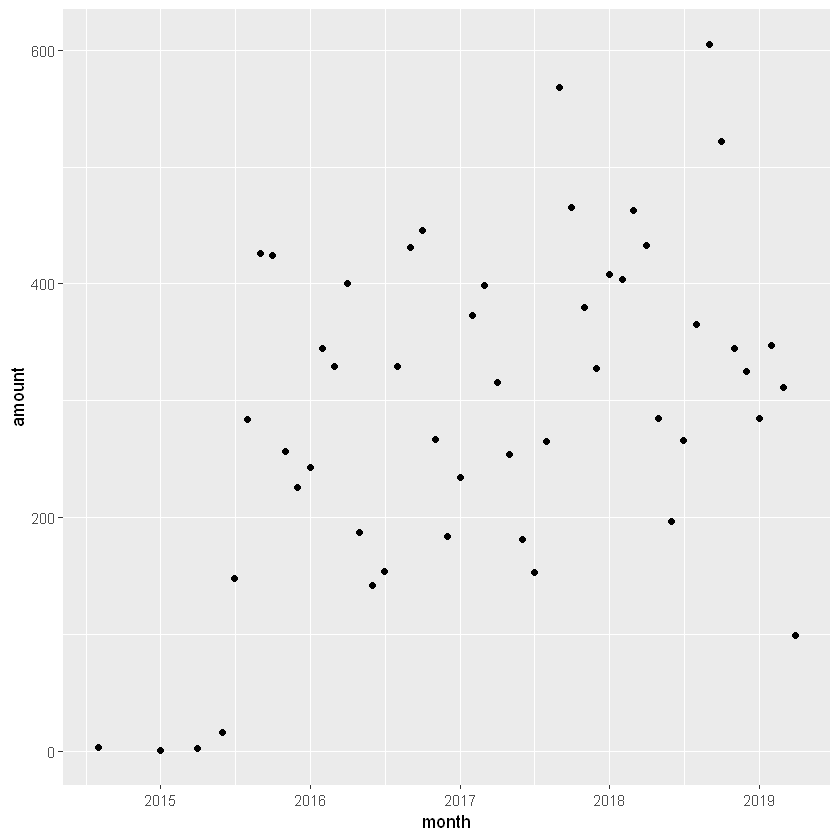

In [13]:
#to make a ggplot you need to include the name of the dataset (DateInfoMonthy), and then an aesthetic tag aes(). In the aes tag you specify a variable to an axis.
ggplot(DateInfoMonthly, aes(x = month, y = amount)) +
    #we include the + symbol as a way to link the functions together. We do this at every step in a ggplot.
    geom_point()

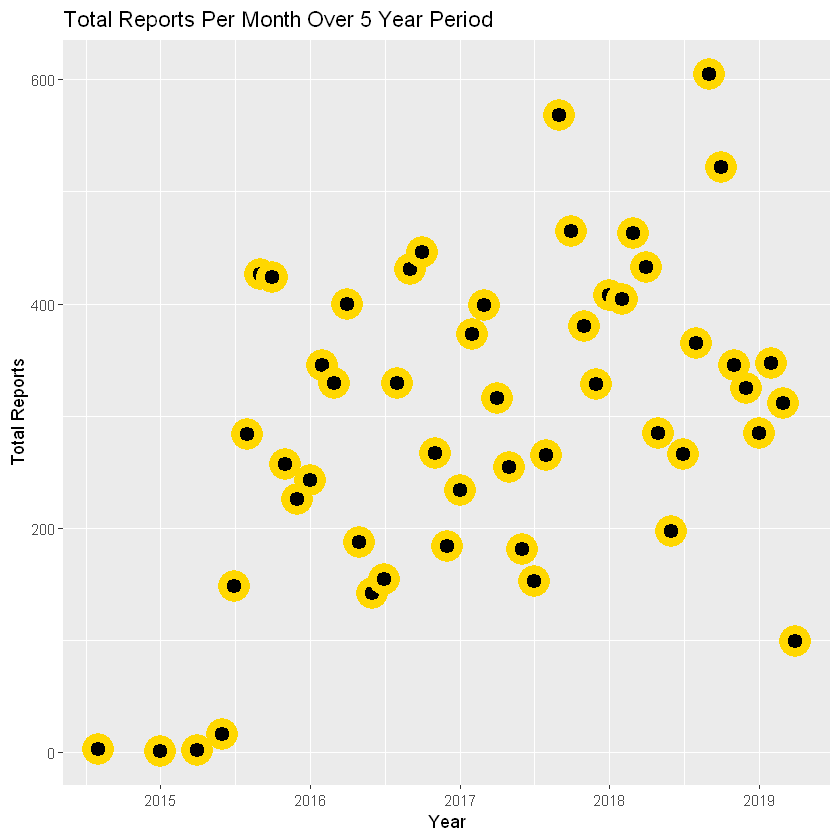

In [14]:
ggplot(DateInfoMonthly, aes(x = month, y = amount)) +
    #we can change our graph by modifying the inputs in our function.
    #color determines the border, fill is the inside color, size determines the size of the circle
    #stroke determines the width of the border, shape sets the shape of the dot. In this case if makes it multi colored.
    #na.rm = TRUE removes any null values
    #all of these tags are optional and are only used to modify how the graph looks visually
    geom_point(color = "gold", fill = "black", size = 4, stroke = 4, shape = 21, na.rm = TRUE) +
    #we use this line to set our x label
    xlab("Year") +
    #we use this line to set our y label
    ylab("Total Reports") +
    #we use this line to set a title to our graph
    ggtitle("Total Reports Per Month Over 5 Year Period")

## Bar Charts

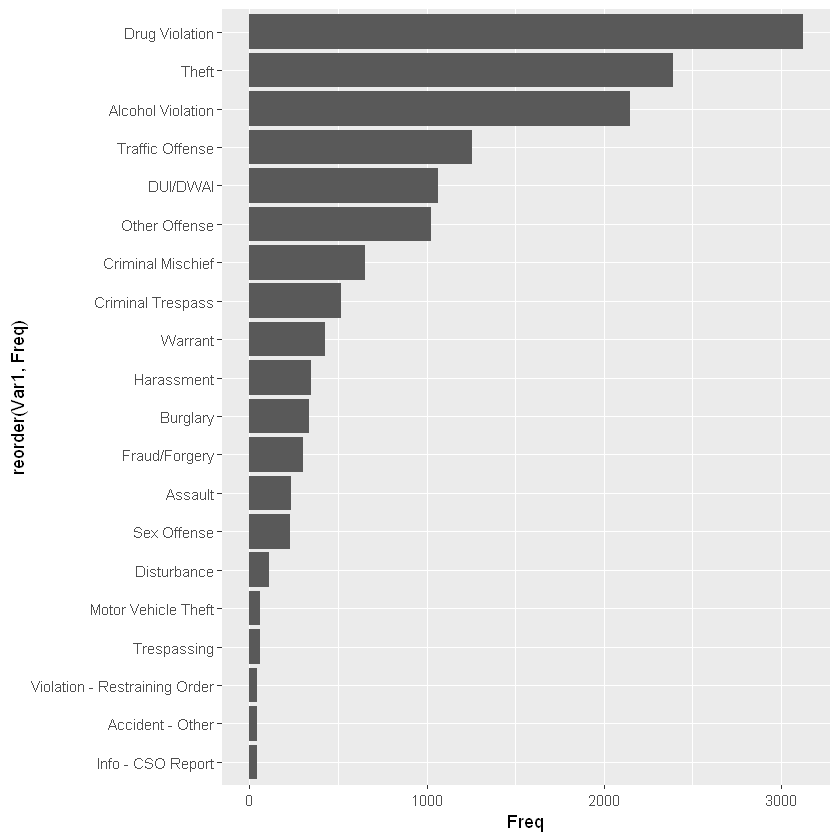

In [15]:
#here we are reordering the columns in our graph so that they are in numerical order. You can see that we are switching to order by the size instead of the name of the violation.
ggplot(incidentInfoSorted, aes(x = Freq, y = reorder(Var1, Freq))) +
    #stat = "identity" is a simple syntax issue. If we do not have it we will get an error for this graph. It's not always needed, but sometimes you have to add it.
    geom_bar(stat = "identity")

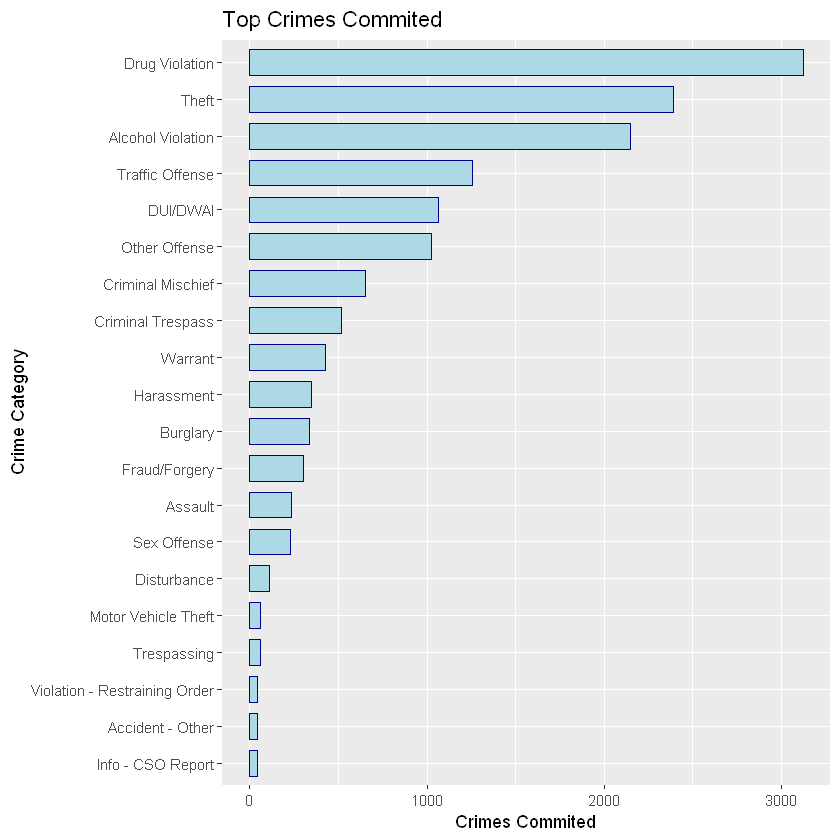

In [16]:
ggplot(incidentInfoSorted, aes(x = Freq, y = reorder(Var1, Freq))) +
    #similarly to the other graph, color is the border and fill is the inside color. We can also change the width of the bars by using the width tag.
    geom_bar(stat = "identity", color = "darkblue", fill = "lightblue", width = .7) +
    #set x axis label
    xlab("Crimes Commited") +
    #set y axis label
    ylab("Crime Category") +
    #set title label
    ggtitle("Top Crimes Commited")

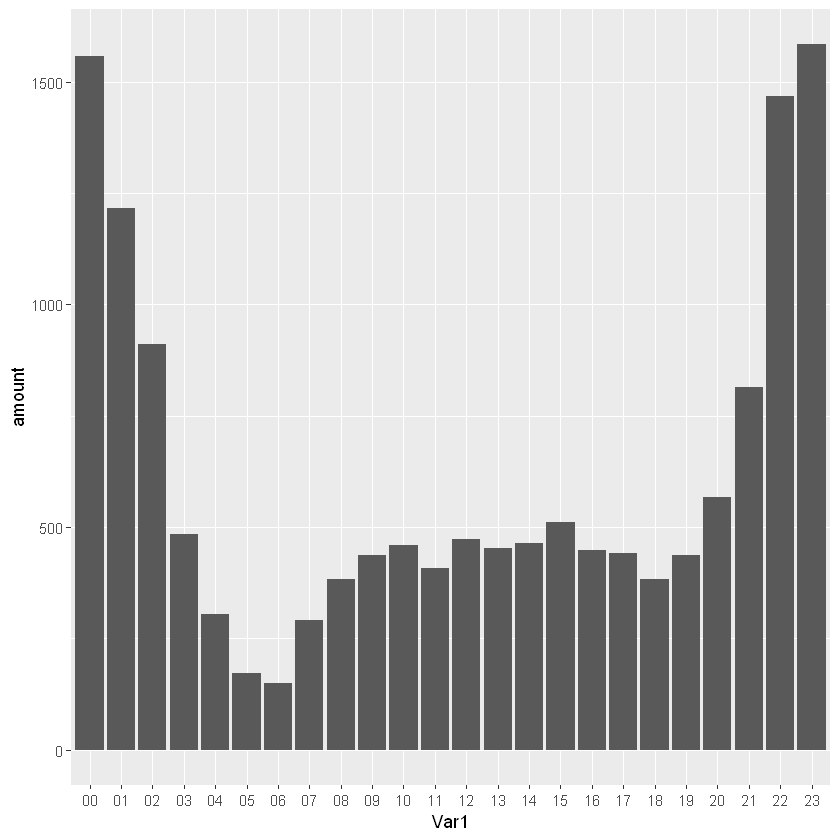

In [17]:
#no reordering is used here because we want to look at how reports change per hour.
ggplot(timeInfoHourly, aes(x = Var1, y = amount)) +
    geom_bar(stat = "identity")

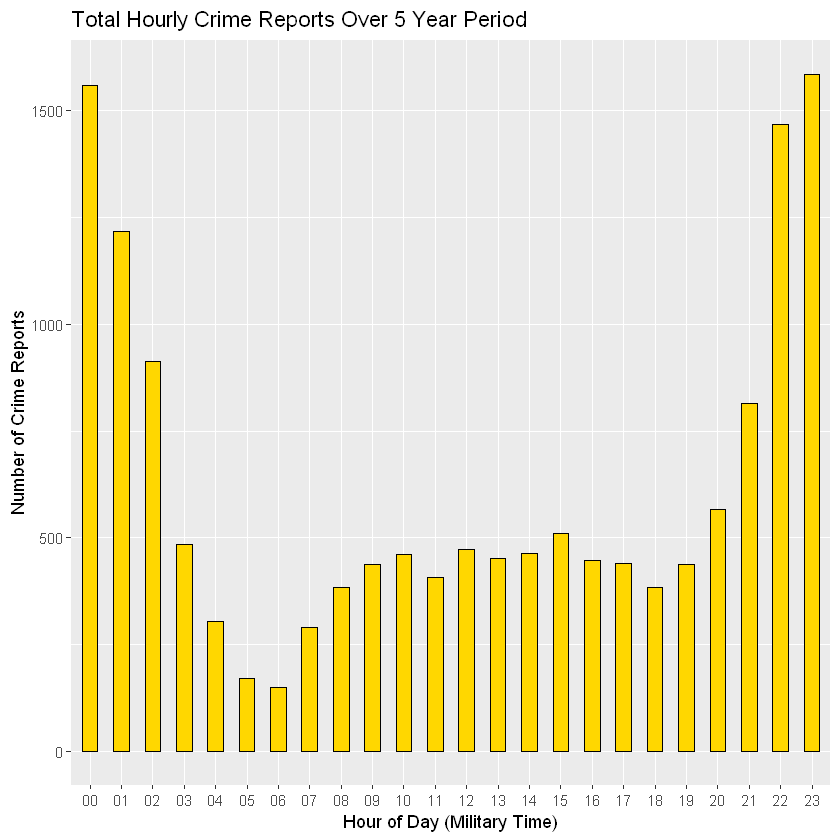

In [22]:
ggplot(timeInfoHourly, aes(x = Var1, y = amount)) +
    #same as previous bar graph, just with different colors and a different width
    geom_bar(stat = "identity", color = "Black", fill = "Gold", width = .5) +
    #set x label
    xlab("Hour of Day (Military Time)") +
    #set y label
    ylab("Number of Crime Reports") +
    #set title
    ggtitle("Total Hourly Crime Reports Over 5 Year Period")

## Histograms

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


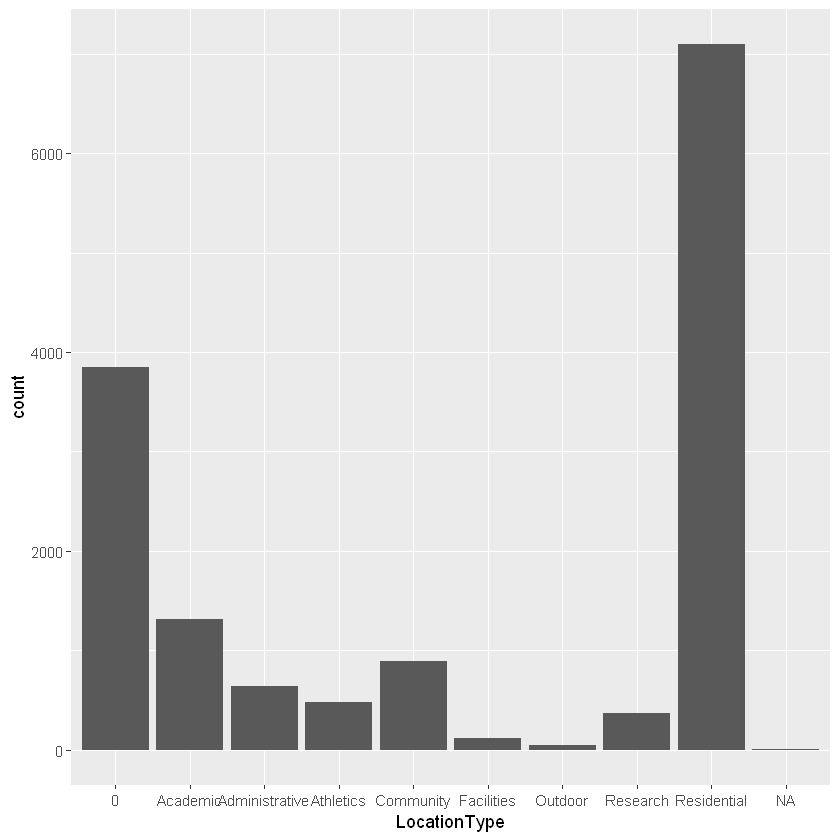

In [51]:
#histograms only take in one axis. you can specify whether it is the x or y axis however
ggplot(data, aes(x = LocationType)) +
    #setting our stat = count so that we return the number of times each word occurred in the LocationType column
    geom_histogram(stat = "count")
    #notice that the names are a little difficult to read on the x axis. we will change this in the next cell.

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


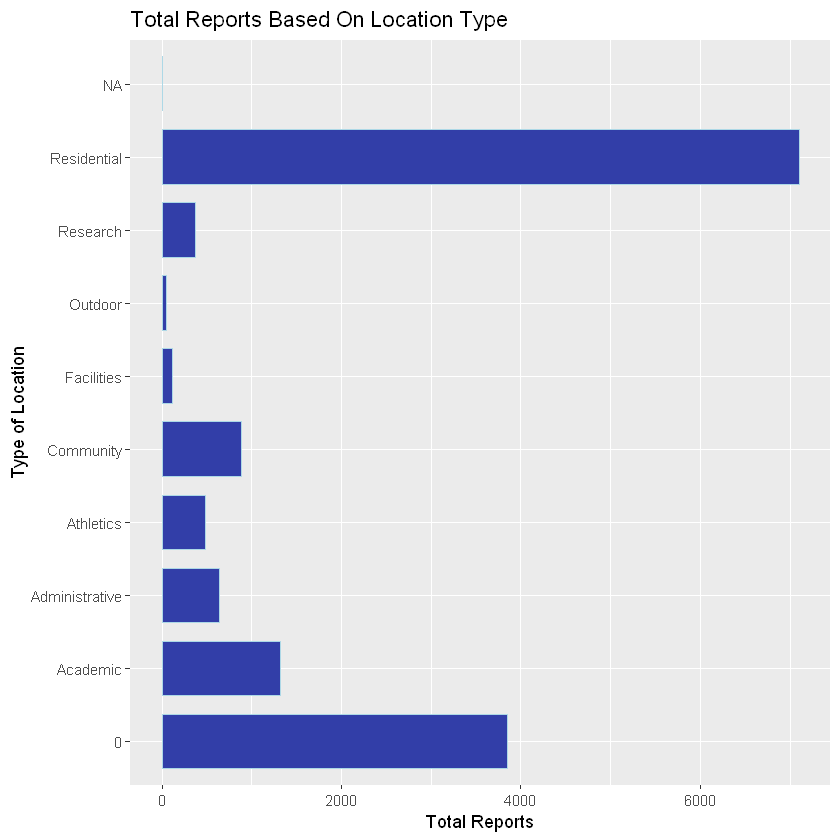

In [54]:
#we have a couple of options to flip the axis. we could either set location type = y instead of = x. 
#Or we can use the coord_flip() function to swap our axis
ggplot(data, aes(y = LocationType)) +
    geom_histogram(stat = "count", color = "lightblue", fill = "#323ea8", width = .75) +
    #coord_flip() +
    xlab("Total Reports") +
    ylab("Type of Location") +
    ggtitle("Total Reports Based On Location Type")